<h1> LABORATORIO 6</h1>
<h1> APRENDIZAJE NO SUPERVISADO</h1>
<h1> ING DE SISTEMAS</h1>
<h1> Juan Sebastian Delgadillo Llanos</h1>
<h1> Rodrigo Jairo Loaiza Coronado</h1>
<h1> Diego Roberto Arancibia Delgado</h1>



In [10]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

In [8]:
data = pd.read_csv('/content/drive/MyDrive/SIS420/LABORATORIOS/Lab6/Churn_Modelling.csv', delimiter=";")

data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# Paso 2: Preprocesamiento de datos
# Convertir características categóricas en variables numéricas usando codificación de etiquetas
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Paso 3: Normalización de características
# Es una buena práctica normalizar las características para que tengan una media de 0 y una desviación estándar de 1.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['CustomerId', 'Surname']))  # Excluimos las columnas no numéricas y no relevantes para el clustering

# Paso 4: Entrenar el modelo K-Means
k = 3 # Número de clusters que deseas
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)

# Paso 5: Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Paso 6: Analizar los resultados y realizar cualquier postprocesamiento necesario
# Por ejemplo, puedes agregar las etiquetas de los clusters al conjunto de datos original
data['Cluster'] = labels
import matplotlib.pyplot as plt



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

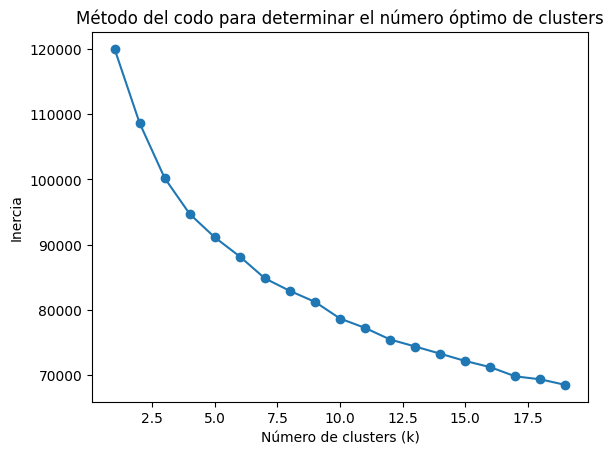

In [12]:
import matplotlib.pyplot as plt
# Lista para almacenar los valores de la inercia
inertia = []

# Rango de valores de k que quieres probar
k_range = range(1, 20)

# Itera sobre cada valor de k y calcula la inercia
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Traza la curva del método del codo
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

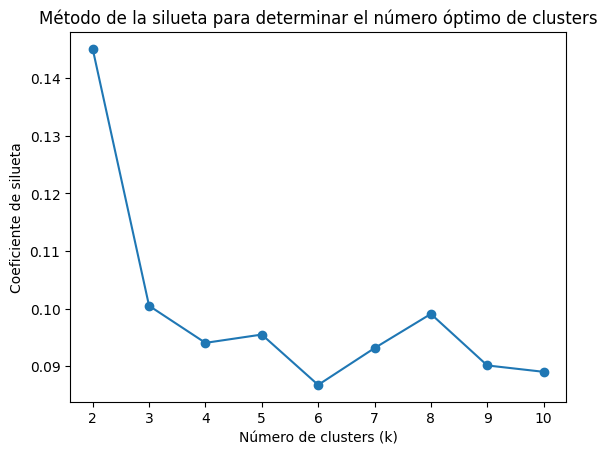

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lista para almacenar los valores del coeficiente de silueta
silhouette_scores = []

# Rango de valores de k que quieres probar
k_range = range(2, 11)  # Probamos desde 2 hasta 10 clusters

# Itera sobre cada valor de k y calcula el coeficiente de silueta
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Traza la curva del método de la silueta
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de silueta')
plt.title('Método de la silueta para determinar el número óptimo de clusters')
plt.xticks(k_range)  # Ajustamos los ticks del eje x para mostrar todos los valores de k
plt.show()

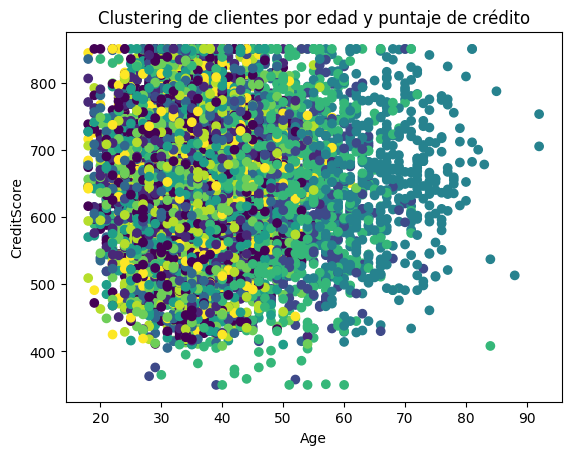

In [14]:
import matplotlib.pyplot as plt

# Trama de dispersión de los clusters
plt.scatter(data['Age'], data['CreditScore'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Clustering de clientes por edad y puntaje de crédito')
plt.show()

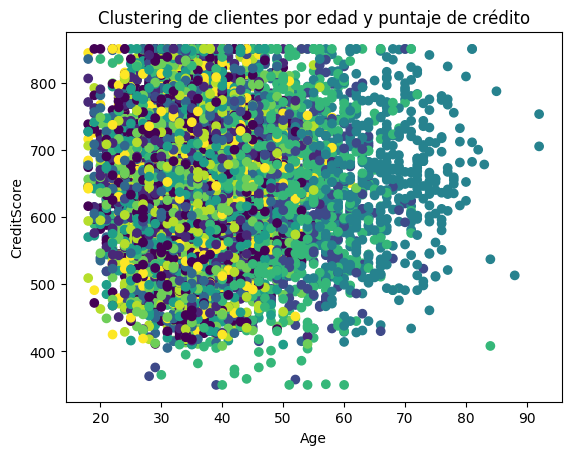

In [15]:
import matplotlib.pyplot as plt

# Trama de dispersión de los clusters
plt.scatter(data['Age'], data['CreditScore'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Clustering de clientes por edad y puntaje de crédito')
plt.show()

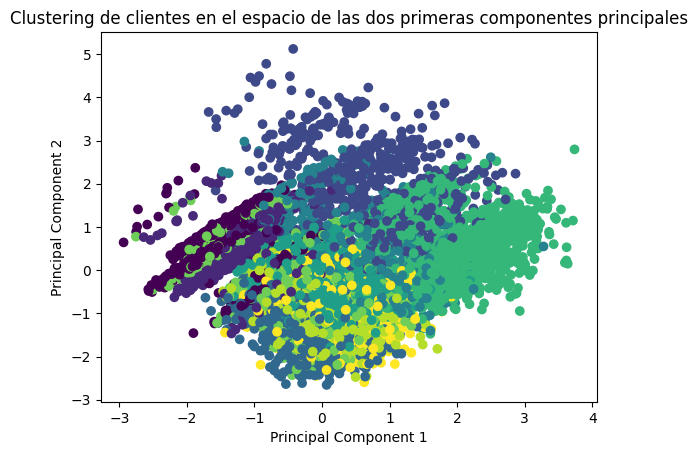

In [16]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Trama de dispersión de los clusters en las dos primeras componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()

In [17]:
# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
train_data['Geography'] = label_encoder.fit_transform(train_data['Geography'])
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])

test_data['Geography'] = label_encoder.fit_transform(test_data['Geography'])
test_data['Gender'] = label_encoder.fit_transform(test_data['Gender'])

train_data = data.drop(columns=['CustomerId', 'Surname'])
test_data = data.drop(columns=['CustomerId', 'Surname'])
# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.drop(['Exited'], axis=1)
y_test = test_data['Exited']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['Exited'], axis=1)
y_train = train_data['Exited']
m_train = len(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 10000
El 20% de ejemplos que seran para el entrenamiento son: 10000


In [18]:

X_train

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,2
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,2
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,1
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,0,1,39,5,0.00,2,1,0,96270.64,1
9996,9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,0,0,36,7,0.00,1,0,1,42085.58,2
9998,9999,772,1,1,42,3,75075.31,2,1,0,92888.52,2


In [19]:
import numpy as np

# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

In [20]:
X_train_

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
0,0.003922,2.427451,0.000000,0.000000,0.164706,0.007843,0.000000,0.003922,0.003922,0.003922,397.446588,0.007843
1,0.007843,2.384314,0.007843,0.000000,0.160784,0.003922,328.658275,0.003922,0.000000,0.003922,441.343451,0.000000
2,0.011765,1.968627,0.000000,0.000000,0.164706,0.031373,626.120784,0.011765,0.003922,0.000000,446.790471,0.007843
3,0.015686,2.741176,0.000000,0.000000,0.152941,0.003922,0.000000,0.007843,0.000000,0.000000,367.947569,0.003922
4,0.019608,3.333333,0.007843,0.000000,0.168627,0.007843,492.199294,0.003922,0.003922,0.003922,310.133725,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.200000,3.023529,0.000000,0.003922,0.152941,0.019608,0.000000,0.007843,0.003922,0.000000,377.531922,0.003922
9996,39.203922,2.023529,0.000000,0.003922,0.137255,0.039216,224.978863,0.003922,0.003922,0.003922,398.822627,0.000000
9997,39.207843,2.780392,0.000000,0.000000,0.141176,0.027451,0.000000,0.003922,0.000000,0.003922,165.041490,0.007843
9998,39.211765,3.027451,0.003922,0.003922,0.164706,0.011765,294.412980,0.007843,0.003922,0.000000,364.268706,0.007843


In [21]:
from sklearn.cluster import KMeans

k = 3  # Número de grupos

kmeans = KMeans(n_clusters=k, random_state=42)
# Ajustar el modelo K-Means utilizando el conjunto de datos X_train_
kmeans.fit(X_train_)

# Agregar los grupos generados por KMeans a tu DataFrame train_data
train_data['kmeans_3'] = kmeans.labels_
# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# luego transforma estos datos en distancias euclidianas a los centroides de los clusters.
X_digits_dist = kmeans.fit_transform(X_train_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(10000, 3)
[[ 22.62901738 512.22893791 516.18108547]
 [327.97036553 208.67666333 285.77122336]
 [623.55234873 208.92278983 292.70877118]
 ...
 [223.846299   636.83876664 476.63404099]
 [290.37351214 288.90768157 247.21138015]
 [558.42761565 441.39897901  61.90983453]]


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Instancia del modelo de regresión logística
logistic_regression = LogisticRegression()

# Ajustar el modelo de regresión logística a los datos de entrenamiento
logistic_regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular el porcentaje de precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir el porcentaje de precisión
print("Porcentaje de precisión:", accuracy)

Porcentaje de precisión: 0.7892


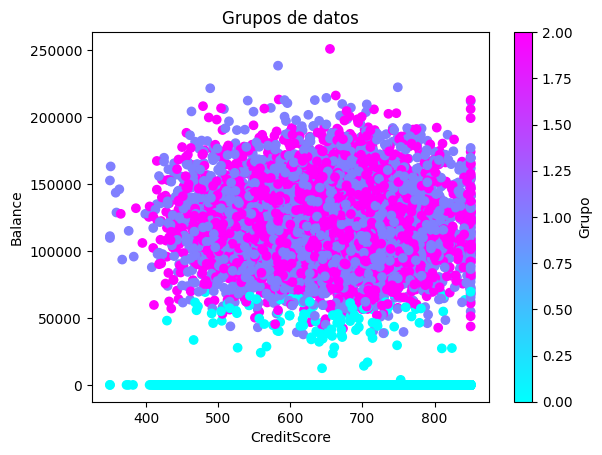

In [25]:
# Graficar los grupos
plt.scatter(train_data['CreditScore'], train_data['Balance'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('CreditScore')
plt.ylabel('Balance')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

In [ ]:
# Supongamos que tienes algunos datos para predecir
# Por ejemplo, tomaremos la primera fila del conjunto de prueba
# Asegúrate de ajustar los datos según corresponda a tu conjunto de datos
datos_nuevos = X_test.iloc[5]

# Realizamos la predicción utilizando el modelo entrenado
prediccion = logistic_regression.predict([datos_nuevos])

# Imprimimos la predicción
print("Predicción:", prediccion)


Predicción: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


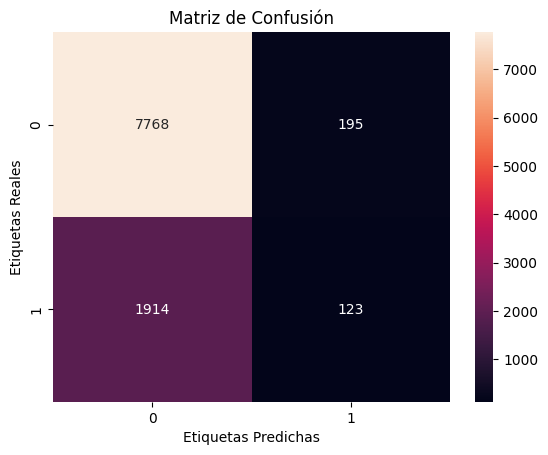

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()
